In [167]:
# 3D spot finding
from skimage import feature, io, img_as_ubyte, exposure, draw
import matplotlib.pyplot as plt
import numpy as np
from tifffile import imread, imwrite

img_dir = "/Users/snk218/Dropbox (NYU Langone Health)/mac_files/holtlab/data_and_results/Farida_LINE1/spot_counting/20221030_LINE1"
img_file = "zstack_001.tif"

spot_ch=0

full_stack = io.imread(f"{img_dir}/{img_file}")


In [102]:
full_stack.shape

(28, 5, 900, 600)

In [103]:
spot_stack = full_stack[:,0,:,:]

In [104]:
spot_stack.shape

(28, 900, 600)

In [105]:
spot_stack = exposure.rescale_intensity(spot_stack)

(100, 100)
uint16


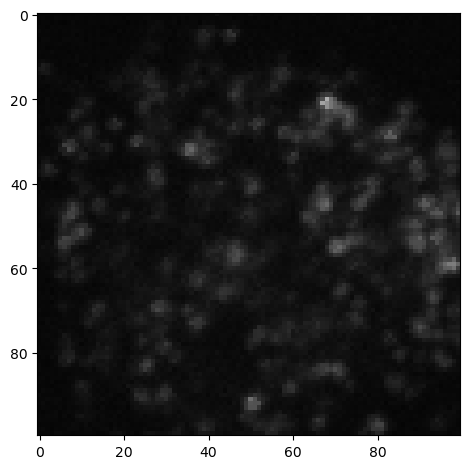

In [106]:
sample_cell = spot_stack[7][150:250,450:550]
print(sample_cell.shape)
print(sample_cell.dtype)
io.imshow(sample_cell)

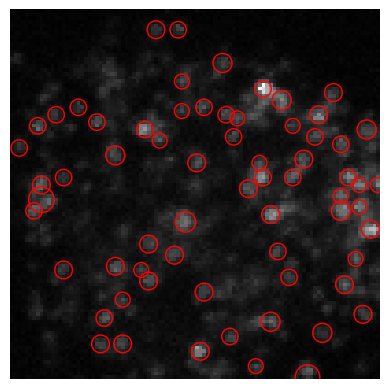

In [107]:
plt.figure() #figsize=(15,15))
ax=plt.gca()

blobs = feature.blob_log(sample_cell, min_sigma=1, max_sigma=3, num_sigma=10, threshold=0.05, overlap=0.75)

for x,y,sigma in blobs:
  # The radius of each blob is approximately 2*sqrt(sigma)
  c = plt.Circle((y, x), 2*np.sqrt(sigma), color="red", linewidth=1, fill=False) 
  ax.add_patch(c)

plt.imshow(sample_cell, cmap="gray")
plt.axis('off')
plt.show()

In [199]:
blobs = feature.blob_log(spot_stack, min_sigma=1, max_sigma=3, num_sigma=10, threshold=0.01, overlap=0.5)
print(len(blobs))
# on each slice, label blobs: combine as one movie
labels_stack=np.zeros_like(spot_stack)
for p,r,c,sigma in blobs:  

    radius=2*np.sqrt(sigma)
    
    # draw circle on image
    rr, cc = draw.circle_perimeter(int(r), int(c), int(radius), 
                                   method='bresenham', shape=labels_stack[0].shape)
    
    labels_stack[int(p), rr, cc] = 65535
    
sample_cell_ij_stack=np.stack([spot_stack, labels_stack], axis=1)

imwrite(f"{img_dir}/{img_file[:-4]}-marked-blobs.tif",
        sample_cell_ij_stack,
        imagej=True,
        metadata={'axes': 'ZCYX'}
        )

1465
